In [28]:
# import the necessary packages
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import img_to_array
from keras.utils import to_categorical
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
import os
import h5py
import tensorflow as tf
import matplotlib



import numpy as np
import os
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import SGD, RMSprop
from keras.utils import np_utils
from keras import backend as K
from sklearn.model_selection import StratifiedKFold

from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

In [6]:
# initialize the number of epochs to train for, initial learning rate,
# and batch size
dataset = 'data'
# model_path = 'AllStressesModel_upsdataample_dropout.h5'
plot = 'Accuracy_plot_upsample_dropout'

In [7]:
# read in data ################################################################
# initialize the data and labels
print("[INFO] loading images...")
data = []
labels = []
 
# grab the image paths and randomly shuffle them
imagePaths = sorted(list(paths.list_images(dataset)))
random.seed(42)
random.shuffle(imagePaths)

[INFO] loading images...


In [8]:
# loop over the input images
for imagePath in imagePaths:
    # load the image, pre-process it, and store it in the data list
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (28, 28))
    image = img_to_array(image)
    data.append(image)
    
    # extract the class label from the image path and update the
    # labels list
    label = imagePath.split(os.path.sep)[-2]
    if label == 'rose':
        label = 0
    elif label == 'daisy':
        label = 1
    elif label == 'tulip':
        label = 2
    elif label == 'sunflower':
        label = 3
    elif label == 'dandelion':
        label = 4
#     elif label == 'PhosphorusDeficiency':
#         label = 5
#     elif label == 'Rust':
#         label = 6
    labels.append(label)

In [11]:
len(data)

4323

In [12]:
len(labels)

4323

In [24]:
# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

In [34]:
def create_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(28, 28,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(5))
    model.add(Activation('softmax'))

    return model
###############################################################################
# train the network



[INFO] compiling model...
[INFO] training network...
Epoch 1/15
101/101 [==============================] - 2s 18ms/step - loss: 1.6005 - acc: 0.2460 - val_loss: 1.6033 - val_acc: 0.2165
Epoch 2/15
101/101 [==============================] - 2s 16ms/step - loss: 1.6004 - acc: 0.2296 - val_loss: 1.6021 - val_acc: 0.2396
Epoch 3/15
101/101 [==============================] - 2s 16ms/step - loss: 1.5988 - acc: 0.2437 - val_loss: 1.6021 - val_acc: 0.2396
Epoch 4/15
101/101 [==============================] - 2s 16ms/step - loss: 1.6013 - acc: 0.2404 - val_loss: 1.6023 - val_acc: 0.2396
Epoch 5/15
101/101 [==============================] - 2s 15ms/step - loss: 1.5971 - acc: 0.2450 - val_loss: 1.6029 - val_acc: 0.2396
Epoch 6/15
101/101 [==============================] - 2s 15ms/step - loss: 1.6009 - acc: 0.2390 - val_loss: 1.6023 - val_acc: 0.2396
Epoch 7/15
101/101 [==============================] - 2s 16ms/step - loss: 1.5979 - acc: 0.2491 - val_loss: 1.6021 - val_acc: 0.2396
Epoch 8/15
101/1

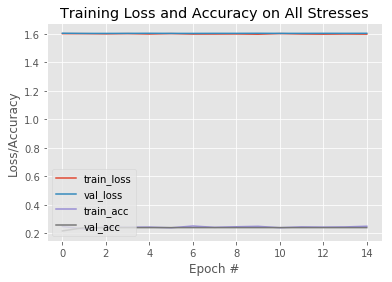

In [36]:

# EPOCHS = 15
# INIT_LR = 1e-3
# BS = 32

# # partition the data into training and testing splits using 75% of
# # the data for training and the remaining 25% for testing
# (trainX, testX, trainY, testY) = train_test_split(data,labels, test_size=0.25, random_state=42)

# # convert the labels from integers to vectors
# trainY = to_categorical(trainY, num_classes=5)
# testY = to_categorical(testY, num_classes=5)

# # construct the image generator for data augmentation
# aug = ImageDataGenerator(rotation_range=30, width_shift_range=0.1,
#     height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
#     horizontal_flip=True, fill_mode="nearest")

# # initialize the model
# print("[INFO] compiling model...")
# model = create_model()
# opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
# model.compile(loss="categorical_crossentropy", optimizer=opt,
#     metrics=["accuracy"])

# # train the network
# print("[INFO] training network...")
# H = model.fit_generator(aug.flow(trainX, trainY, batch_size=BS),
#     validation_data=(testX, testY), steps_per_epoch=len(trainX) // BS,
#     epochs=EPOCHS, verbose=1)

# # save the model to disk
# print("[INFO] serializing network...")
# model.save("model.h5")

# # plot the training loss and accuracy
# plt.style.use("ggplot")
# plt.figure()
# N = EPOCHS
# plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
# plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
# plt.plot(np.arange(0, N), H.history["acc"], label="train_acc")
# plt.plot(np.arange(0, N), H.history["val_acc"], label="val_acc")
# plt.title("Training Loss and Accuracy on All Stresses")
# plt.xlabel("Epoch #")
# plt.ylabel("Loss/Accuracy")
# plt.legend(loc="lower left")
# plt.savefig(plot)

In [37]:
# calculate confusion matrix ##################################################
import pandas as pd
model = create_model()
y_pred = model.predict(testX)
y_true = testY.copy()

y_pred = pd.DataFrame(y_pred)
y_true = pd.DataFrame(y_true)

y_pred['class'] = y_pred.idxmax(axis=1)
y_true['class'] = y_true.idxmax(axis=1)

confusion_matrix(y_true['class'],y_pred['class'])

# cross validation ############################################################
from sklearn.model_selection import StratifiedKFold
X = data
Y = labels
seed = 7
np.random.seed(seed)
kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = seed)
cvscores = []
for train, test in kfold.split(X,Y):
    
    # convert the labels from integers to vectors
    trainY = to_categorical(Y[train], num_classes=5)
    testY = to_categorical(Y[test], num_classes=5)
    
    # construct the image generator for data augmentation
    aug = ImageDataGenerator(rotation_range=30, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
    horizontal_flip=True, fill_mode="nearest")
    print("[INFO] compiling model...")
    
    model2 = create_model()
    
    opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
    model2.compile(loss="categorical_crossentropy", optimizer=opt,
                  metrics=["accuracy"])
    
    # train the network
    print("[INFO] training network...")
    model2.fit_generator(aug.flow(X[train], trainY, batch_size=BS),
                            steps_per_epoch=len(X[train]) // BS,
                            epochs=EPOCHS, verbose=1)
    
    scores = model2.evaluate(X[test],testY, verbose = 1)
    print("%s: %.2f%%" % (model2.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

[INFO] compiling model...
[INFO] training network...
Epoch 1/15
121/121 [==============================] - 2s 17ms/step - loss: 1.6031 - acc: 0.2345
Epoch 2/15
121/121 [==============================] - 2s 15ms/step - loss: 1.6015 - acc: 0.2446
Epoch 3/15
121/121 [==============================] - 2s 15ms/step - loss: 1.6003 - acc: 0.2404
Epoch 4/15
121/121 [==============================] - 2s 15ms/step - loss: 1.6003 - acc: 0.2422
Epoch 5/15
121/121 [==============================] - 2s 15ms/step - loss: 1.5988 - acc: 0.2531
Epoch 6/15
121/121 [==============================] - 2s 15ms/step - loss: 1.6013 - acc: 0.2386
Epoch 7/15
121/121 [==============================] - 2s 15ms/step - loss: 1.5987 - acc: 0.2456
Epoch 8/15
121/121 [==============================] - 2s 14ms/step - loss: 1.5995 - acc: 0.2373
Epoch 9/15
121/121 [==============================] - 2s 14ms/step - loss: 1.5996 - acc: 0.2348
Epoch 10/15
121/121 [==============================] - 2s 14ms/step - loss: 1.6007 

121/121 [==============================] - 2s 15ms/step - loss: 1.5995 - acc: 0.2400
Epoch 5/15
121/121 [==============================] - 2s 15ms/step - loss: 1.5995 - acc: 0.2423
Epoch 6/15
121/121 [==============================] - 2s 15ms/step - loss: 1.6002 - acc: 0.2431
Epoch 7/15
121/121 [==============================] - 2s 15ms/step - loss: 1.5983 - acc: 0.2418
Epoch 8/15
121/121 [==============================] - 2s 14ms/step - loss: 1.5901 - acc: 0.2514
Epoch 9/15
121/121 [==============================] - 2s 14ms/step - loss: 1.5578 - acc: 0.2706
Epoch 10/15
121/121 [==============================] - 2s 14ms/step - loss: 1.5192 - acc: 0.2957
Epoch 11/15
121/121 [==============================] - 2s 15ms/step - loss: 1.5078 - acc: 0.3044
Epoch 12/15
121/121 [==============================] - 2s 15ms/step - loss: 1.5064 - acc: 0.3026
Epoch 13/15
121/121 [==============================] - 2s 15ms/step - loss: 1.5032 - acc: 0.3083
Epoch 14/15
121/121 [==========================